In [1]:
import torch

In [2]:
y = torch.rand((10,5))
print(y.shape, y.view((-1, 25)).shape[0] )

torch.Size([10, 5]) 2


In [2]:
import torchvision
from torchvision import transforms, datasets

In [14]:
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

Processing...
Done!


In [16]:
dir(test)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 'download',
 'processed_folder',
 'raw_folder',
 'root',
 'target_transform',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'training_file',
 'transform',
 'urls']

In [17]:
test.test_data.shape

torch.Size([10000, 28, 28])

In [18]:
train.train_data.shape

torch.Size([60000, 28, 28])

torch.Size([28, 28])


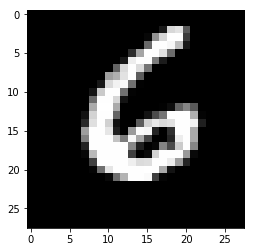

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

print( train.train_data[90].shape )
plt.imshow( train.train_data[90], cmap='gray'); 

In [42]:
## Create generator/iterator
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

print(dir(trainset))

#print(trainset.shape, testset.shape)

['_DataLoader__initialized', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'batch_sampler', 'batch_size', 'collate_fn', 'dataset', 'drop_last', 'num_workers', 'pin_memory', 'sampler', 'timeout', 'worker_init_fn']


In [44]:
for data in trainset:
    print( data.shape )
    #plt.imshow(data)
    break

TypeError: 'type' object is not iterable

In [3]:
import torch.nn as nn
import torch.nn.functional as F

In [164]:
class Net(nn.Module):
    # MNIST = 28*28*1  --> 10 digits 
    def __init__(self, n_inputz, n_outputz, n_hidden=64):
        super().__init__()
        # define the layers or network arch
        self.fc1 = nn.Linear(n_inputz, n_hidden) # 
        self.fc2 = nn.Linear(n_hidden, n_hidden) # 
        self.fc3 = nn.Linear(n_hidden, n_hidden) # 
        self.fc4 = nn.Linear(n_hidden, n_outputz) # 
        
    def forward(self, x):
        x = F.relu( self.fc1(x) ) 
        x = F.relu( self.fc2(x) ) 
        x = F.relu( self.fc3(x) ) 
        x = F.log_softmax( self.fc4(x), dim=1) 
        return x
        
        

In [165]:
net = Net(28*28, 10)
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [166]:
x = torch.rand((28,28))
print( x.shape, x.mean())

torch.Size([28, 28]) tensor(0.5108)


In [167]:
xi = x.view(1,-1)
print(xi.shape, x.view(-1, 28*28).shape, type(xi))
p = net(xi)
print(p.shape, p.mean())
p

torch.Size([1, 784]) torch.Size([1, 784]) <class 'torch.Tensor'>
torch.Size([1, 10]) tensor(-2.3072, grad_fn=<MeanBackward1>)


tensor([[-2.2895, -2.1931, -2.2845, -2.2840, -2.4778, -2.2712, -2.2911, -2.5068,
         -2.2112, -2.2629]], grad_fn=<LogSoftmaxBackward>)

In [5]:
import torch.optim as optim
import numpy as np
optimizer = optim.Adam(net.parameters(), lr=0.001) ##TODO: decay, TL and freezing weights 

EPOCH = 3

# TODO: batches and prior error fix 
xtrain_batch = [train.train_data[((i*10)+1):(i+1)*10] for i in range(5)] 
ytrain_batch = [train.train_labels[((i*10)+1):(i+1)*10] for i in range(5)] 
print(len(xtrain_batch), xtrain_batch[-1].shape, ytrain_batch[-1])

xtrain_batch = [ [torch.rand((28,28)) for i in range(10)] for j in range(5)]
print(len(xtrain_batch))
## ==== Training and Backpropagation ==== 
for e in range(EPOCH):
    for X, y in zip(xtrain_batch, ytrain_batch):        
        #print(y[-1], x[-1].shape);
        #plt.imshow(x[-1])
        #break
        # 
        net.zero_grad() ## reset grad after every batch to stop the accumulation 
        # to do tensor pass graph 
        #predz = net( X.view(-1, 28*28) ) # torch.tensor([i.view(1, -1) for i in x] ) )
        print(X[0].shape, type(X[0]) ) 
        #predz = torch.Tensor( [ net(xi.view(1, -1)) for xi in X] ) 
        predz = net(X.view(-1, 28*28) )
        print(predz.shape)
        
        loss = F.nll_loss(predz, y)
        loss.backward()
        optimizer.step() 
        
    print(f"epoch {e}: {loss}")
        

NameError: name 'net' is not defined

In [169]:
print( torch.__version__)

1.0.1


In [170]:
## Assess accuracy on test data

correct, total = 0, 0 

with torch.no_grad(): ## don't calc gradients b/c test data <<< net.train() + net.eval() in old versions??    
    for X, y in zip(xtrain_batch, ytrain_batch):  
        predz = [ net(xi.view(1, -1)) for xi in X]
        for idx,i in enumerate(predz):
            #print( (i.shape), idx, i.argmax(), y.shape)
            if idx <len(y) and torch.argmax(i) == y[idx]:
                correct += 1
            total +=1
            
print(f"Accuracy: {round(correct/total, 3)}")
    

Accuracy: 0.12


In [171]:
len(y)

9

## CNNs Part 1

In [4]:
## ==== CNNs =====

import os, glob
import cv2
import numpy as np
from tqdm import tqdm 

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
REBUILD_DATA = True

In [11]:
class DogsVsCats:
    IMG_SIZE = 50 ## resize such that max dimension is 50 + pad the smallest size
    DIR_CATS = "../data/PetImages/Cat"
    DIR_DOGS = "../data/PetImages/Dog"
    LABELS = {DIR_CATS: 0, DIR_DOGS: 1}
    training_data = []
    catcount, dogcount = 0, 0
    
    def make_training_data(self, output_file):
        ## 1. load data
        for label in self.LABELS:
            print(f'loading {label}')
            for ipath in tqdm(glob.glob(f"{label}/*")): 
                try:
                    img = cv2.imread(ipath, cv2.IMREAD_GRAYSCALE )
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append( [img,
                                               np.eye(2)[self.LABELS[label]]] ) ## y-label as one-hot

                    if label == self.DIR_CATS:
                        self.catcount += 1
                    elif label == self.DIR_DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass
        ## 2. shuffle
        np.random.shuffle(self.training_data)
        np.save(output_file, self.training_data)
        print(f"Dogs: {self.dogcount}\t{(self.dogcount/(self.dogcount+self.catcount))}" )
        print(f"Cats: {self.catcount}\t{(self.dogcount/(self.dogcount+self.catcount))}" )
    #                 plt.imshow(img)
    #                 print(img.shape)
    #                 break;
    
## numpy.eye == diagonal identity matrix for one-hot-encoding

In [18]:
DATA_SAVED_FILE = "trainin_data.npy"
if REBUILD_DATA:
    dc = DogsVsCats()
    dc.make_training_data(DATA_SAVED_FILE)
    REBUILD_DATA = False
    print( "Done Building data and set it to: ", REBUILD_DATA)

  0%|          | 33/12501 [00:00<00:38, 320.52it/s]

loading ../data/PetImages/Cat


  0%|          | 32/12501 [00:00<00:39, 318.96it/s]

loading ../data/PetImages/Dog


100%|██████████| 12501/12501 [00:26<00:00, 465.43it/s]


Dogs: 12470	0.49987974023891607
Cats: 12476	0.49987974023891607
Done Building data and set it to:  False


24946
[1. 0.]


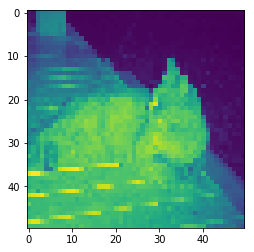

In [6]:
training_data = np.load( "trainin_data.npy")
print(len(training_data))
print( training_data[0][1])
plt.imshow(training_data[0][0]);

# CNN Part 2

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

class DogCatNet(nn.Module):
    def __init__(self, n_input=50, n_output=2, n_hidden=2, n_kernel=5):
        super().__init__()
        ## arch << pooling is defined infwd pass 
        self.conv1 = nn.Conv2d(1, 32, n_kernel)
        self.conv2 = nn.Conv2d(32, 64, n_kernel)
        self.conv3 = nn.Conv2d(64, 128, n_kernel)
        
        ## Do fake data to determine size to linear 
        x = torch.randn(n_input,n_input).view(-1, 1, n_input, n_input)
        self._to_linear = None 
        self.convs(x)        
        self.fc1 = nn.Linear( self._to_linear, 128)
        self.fc2 = nn.Linear(128, n_output)
        
        print('_to_linear', self._to_linear)
        
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2) )
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2) )
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2) )
        
        if self._to_linear is None:
            print( x.shape)
            self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2]
        return x 
    
    def forward(self, x):
        x = self.convs(x)  
        x = x.view(-1, self._to_linear) #reshape flatten 
        x = F.relu( self.fc1(x))
        x = F.log_softmax( self.fc2(x), dim=1)  
        return x 
        

In [9]:
dc_net = DogCatNet()
print(dc_net)

torch.Size([1, 128, 2, 2])
_to_linear 512
DogCatNet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


In [12]:
import torch.optim as optim
optimizer = optim.Adam(dc_net.parameters(), lr=0.001)
loss_func = nn.MSELoss()

X = torch.Tensor([ i[0] for i in training_data]).view(-1, DogsVsCats.IMG_SIZE, DogsVsCats.IMG_SIZE)
X = X/255.0 ## scale intensity values 
y = torch.Tensor([ i[1] for i in training_data]) 

In [13]:
N = len(X)
n_test, n_val = 0.2, 0.1 
n_test, n_val = int(0.2*N), int(0.1*N)
x_N = N-(n_test+n_val)
print(N, x_N, n_test, n_val )

val_X, val_y = X[-n_val:], y[-n_val: ]
test_X, test_y = X[ x_N: -n_val ], y[x_N:-n_val]
train_X, train_y = X[:x_N], y[:x_N]

print(train_X.shape, test_X.shape, val_X.shape)
print(train_y.shape, test_y.shape, val_y.shape)

24946 17463 4989 2494
torch.Size([17463, 50, 50]) torch.Size([4989, 50, 50]) torch.Size([2494, 50, 50])
torch.Size([17463, 2]) torch.Size([4989, 2]) torch.Size([2494, 2])


In [24]:
BATCH_SIZE = 100
EPOCHS = 3

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE) ):
        #print(f"Epoch {epoch}: {i} \t {i+BATCH_SIZE}")
        batch_X = train_X[i : (i+BATCH_SIZE)].view(-1, 1, DogsVsCats.IMG_SIZE, DogsVsCats.IMG_SIZE) ##TODOmatch model IMG_SIZE
        batch_y = train_y[i : (i+BATCH_SIZE)]
        
        # zero the gradients mode.zero_grad Vs optimizer.zero_Grad @@ freezing weights, multiple optimizers in same model, 
        dc_net.zero_grad() 
        # pred
        predz = dc_net(batch_X)
        # loss and backprop
        loss = loss_func(predz, batch_y)
        loss.backward()
        optimizer.step()
        
    print(f"{epoch} epoch loss: {loss}" )
        

  0%|          | 0/175 [00:00<?, ?it/s]

0 epoch loss: 1.6574649810791016


  0%|          | 0/175 [00:00<?, ?it/s]

1 epoch loss: 1.6568198204040527


100%|██████████| 175/175 [01:24<00:00,  2.20it/s]

2 epoch loss: 1.6557691097259521


In [25]:
## Accuracy
correct, total = 0, 0
with torch.no_grad():
    for i in tqdm(range(len(test_X)) ):
        real_y = torch.argmax( test_y[i] )
        net_res = dc_net(test_X[i].view(-1,1,DogsVsCats.IMG_SIZE,DogsVsCats.IMG_SIZE))[0]
        pred_y = torch.argmax(net_res)
        if pred_y == real_y:
            correct += 1
        total +=1
            
print(f"Accuracy: {round(correct/total, 3)}")
    

100%|██████████| 4989/4989 [00:18<00:00, 272.00it/s]

Accuracy: 0.675


In [26]:
print(real_y, " == ", pred_y, "<< ", net_res.shape, net_res)

tensor(1)  ==  tensor(1) <<  torch.Size([2]) tensor([-0.7490, -0.6402])


In [27]:
# weights = np.array([x for x in net.parameters()])
# weights.shape
# weights

## CUDA

In [14]:
torch.cuda.is_available()

False

In [15]:
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

In [16]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
print("Running on: ", device)

Running on:  cpu


In [17]:
## Can assign different parts of the network or even layers to different GPUs
torch.cuda.device_count()

0

In [18]:
## Move ops to GPU for the parts that you need AND also batch level switch between GPU and CPU <<< tensors on GPU can only interact with tensors on the GPU
net.to(device)
net2 = DogCatNet().to(device)
net2

## Ditto at optimizer, loss_func and batchez
# - state optimizer and loss within the train methods or after device setup 
# - batch_X, batch_y = batch_X.to(device), batch_y.to(device)

NameError: name 'net' is not defined

# Visualizaing Model Performance
- in/out sample accuracy and loss

In [18]:
## Train and Test concurrently 
def fwd_pass(net, X, y, loss_func, optimizer, train=False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [ torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs,y)]
    acc = matches.count(True)/len(matches) 
    loss = loss_func(outputs, y)
    
    if train:
        loss.backward()
        optimizer.step()
    return acc, loss


def test(net, test_X, test_y, loss_func, optimizer, size=32,
         imgx=DogsVsCats.IMG_SIZE, imgy=DogsVsCats.IMG_SIZE):
    i = np.random.randint( len(test_X) - size )
    X, y = test_X[i:i+size], test_y[i:i+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(net, 
                                 X.view(-1, 1, imgx, imgy).to(device), 
                                 y.to(device), 
                                 loss_func, optimizer )
    
    return val_acc, val_loss
    

batch size = 30 Test: 0.4666666666666667 	 1.6736030578613281
batch size = 80 Test: 0.5375 	 1.6727049350738525
batch size = 130 Test: 0.5461538461538461 	 1.6733087301254272
batch size = 180 Test: 0.4722222222222222 	 1.6733580827713013
batch size = 230 Test: 0.5260869565217391 	 1.673205018043518
batch size = 280 Test: 0.5071428571428571 	 1.6732876300811768
batch size = 330 Test: 0.48787878787878786 	 1.6735724210739136
batch size = 380 Test: 0.531578947368421 	 1.6731740236282349
batch size = 430 Test: 0.5069767441860465 	 1.6735199689865112
batch size = 480 Test: 0.50625 	 1.6733976602554321


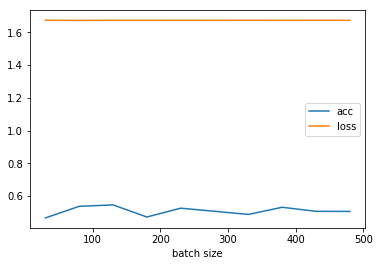

In [19]:
val_accz, val_losz = [], []
for s in range(30, 500, 50):
    val_acc, val_loss = test(dc_net, test_X, test_y, loss_func, optimizer, size=s)
    val_accz.append(val_acc)
    val_losz.append( val_loss)
    print(f"batch size = {s} Test: {val_acc} \t {val_loss}")
    
ss = [s for s in range(30, 500, 50)]
plt.plot(ss, val_accz, label='acc')
plt.plot(ss, val_losz, label='loss')
plt.xlabel('batch size')
plt.legend()
plt.show();

In [20]:
import time

MODEL_NAME = f'dc_net_{int(time.time())}'
print(MODEL_NAME)

dc_net_1612457566


In [21]:
model = DogCatNet().to(device)

optimizer = optim.Adam(dc_net.parameters(), lr=0.001)
loss_func = nn.MSELoss()

def train(net, train_X, train_y, test_X, test_y, 
          loss_func=loss_func, optimizer=optimizer, 
          train=True, epochs=5, batchsize=40,
         imgx=DogsVsCats.IMG_SIZE, imgy=DogsVsCats.IMG_SIZE):
    
    accz, losz = [], []
    val_accz, val_losz = [], []
    ss = []
    with open('model.log', "a") as fd:
        for ep in range(epochs):
            for i in tqdm(range(0, len(train_X), batchsize) ):
                batch_X = train_X[i : (i+batchsize)].view(-1, 1, imgx,imgy) 
                batch_y = train_y[i : (i+batchsize)]              
    
                acc, loss = fwd_pass(net,batch_X.to(device), 
                                         batch_y.to(device), 
                                         loss_func, optimizer )
        
                if i % 50 == 0:
                    v_acc, v_loss = test(net, test_X, test_y, 
                                         loss_func=loss_func, optimizer=optimizer,
                                         size=batchsize)
                    val_accz.append(v_acc)
                    val_losz.append(v_loss)
                    accz.append(acc)
                    losz.append(loss)
                    ss.append(i)
            print(f"epoch {ep}: {acc}, {loss}")
    
    plt.subplot(1,2,1)
    plt.plot(ss, val_accz, label='val_acc')    
    plt.plot(ss, accz, label='train_acc')
    plt.subplot(1,2,2)
    plt.plot(ss, val_losz, label='val_loss')
    plt.plot(ss, losz, label='train_loss')
    plt.xlabel('epoch-batch')
    plt.legend()
    plt.show();

torch.Size([1, 128, 2, 2])
_to_linear 512


  0%|          | 1/437 [00:00<01:03,  6.85it/s]

epoch 0: 0.4782608695652174, 1.6812458038330078


100%|██████████| 437/437 [00:42<00:00, 11.30it/s]


epoch 1: 0.4782608695652174, 1.6812458038330078


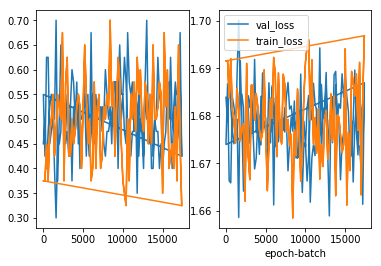

In [22]:
train(model, train_X, train_y, test_X, test_y, epochs=2)